# MASTER Classification Project

By Ednalyn C. De Dios & Michael P. Moran

## Project Planning

### Goals
1. Explain what is driving customers to churn.

### Data Dictionary & Domain Knowledge

### Gender

| Description | gender
| ------------- |:-------------:
| Female      | 0
| Male      | 1

### Phone Service

| Phone Service | phone_id
| ------------- |:-------------:
| No phone      | 0
| One Line      | 1
| Two+ lines    | 2

### Household Type

| Partner & Dependents      | household_type_id
| -------------             |:-------------:
| No partner, no dependents      | 0
| Partner, no dependents      | 1
| No partner, dependents    | 2
| Partner, dependents | 3

### Streaming Services

| Streaming TV & Streaming Movies      | streaming_services
| -------------             |:-------------:
| No internet service      | 0
| No streaming tv, no streaming movies      | 1
| Has streaming tv, no streaming movies    | 2
| No streaming tv, has streaming movies | 3
| Has streaming tv, has streaming movies | 4

### Online Security & Backup

| Online Security & Online Backup      | online_security_backup
| -------------             |:-------------:
| No internet service      | 0
| No security, no backup | 1
| Has security, no backup | 2
| No security, has backup | 3
| Has security, has backup | 4


### gender
| Gender | Value
| ------ |:-----:
| Female | 0
| Male | 1

### device_protection
| Device Protection | Value
| ------ |:-----:
| No internet service | 1
| No | 0
| Yes | 2

### tech_support
| Tech Support | Value
| ------ |:-----:
| No internet service | 1
| No | 0
| Yes | 2

### paperless_billing
| Paperless Billing | Value
| ------ |:-----:
| No | 0
| Yes | 1

### internet_service_type
| internet_service_type_id | internet_service_type |
| ------ |:-----:
|                        1 | DSL                   |
|                        2 | Fiber optic           |
|                        3 | None                  |

### payment types
| payment_type_id | payment_type              |
| ------ |:-----:
|               1 | Electronic check          |
|               2 | Mailed check              |
|               3 | Bank transfer (automatic) |
|               4 | Credit card (automatic)   |


### contract_type_id
| contract_type_id | contract_type  |
| ------ |:-----:
|                1 | Month-to-month |
|                2 | One year       |
|                3 | Two year       |

### Hypotheses

## Prepare Environment

In [39]:
from env import host, user, password

import numpy as np
import pandas as pd

from sqlalchemy import create_engine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

## Acquisition

### Grab Data

In [4]:
def get_db_url(
    hostname: str, username: str, password: str, db_name: str
) -> str:
    """
    return url for accessing a mysql database
    """
    return f"mysql+pymysql://{username}:{password}@{hostname}/{db_name}"


def get_sql_conn(hostname: str, username: str, password: str, db_name: str):
    """
    return a mysql connection object
    """
    return create_engine(get_db_url(host, user, password, db_name))


def df_from_sql(query: str, url: str) -> pd.DataFrame:
    """
    return a Pandas DataFrame resulting from a sql query
    """
    return pd.read_sql(query, url)


def get_telco_data() -> pd.DataFrame:
    db = "telco_churn"
    query = ("SELECT * "
             f"FROM customers;")
    url = get_db_url(host, user, password, db)
    return df_from_sql(query, url)

In [5]:
df = get_telco_data()

In [6]:
def peekatdata(dataframe):
    head_df = dataframe.head()
    print(f"HEAD\n{head_df}", end="\n\n")

    tail_df = dataframe.tail()
    print(f"TAIL\n{tail_df}", end="\n\n")

    shape_tuple = dataframe.shape
    print(f"SHAPE: {shape_tuple}", end="\n\n")

    describe_df = dataframe.describe()
    print(f"DESCRIPTION\n{describe_df}", end="\n\n")

    print(f"INFORMATION")
    dataframe.info()

In [7]:
peekatdata(df)

HEAD
  customer_id  gender  senior_citizen partner dependents  tenure  \
0  0002-ORFBO  Female               0     Yes        Yes       9   
1  0003-MKNFE    Male               0      No         No       9   
2  0004-TLHLJ    Male               0      No         No       4   
3  0011-IGKFF    Male               1     Yes         No      13   
4  0013-EXCHZ  Female               1     Yes         No       3   

  phone_service multiple_lines  internet_service_type_id online_security  \
0           Yes             No                         1              No   
1           Yes            Yes                         1              No   
2           Yes             No                         2              No   
3           Yes             No                         2              No   
4           Yes             No                         2              No   

   ...  device_protection tech_support streaming_tv streaming_movies  \
0  ...                 No          Yes          Yes      

## Data Prep

1. We're computing and returning the values by frequency for each variable.

In [8]:
def df_value_counts(dataframe):
    for col in df.columns:
        n = df[col].unique().shape[0]
        col_bins = min(n, 10)
        print(f"{col}:")
        if df[col].dtype in ['int64', 'float64'] and n > 10:
            print(df[col].value_counts(bins=col_bins, sort=False))
        else:
            print(df[col].value_counts())
        print("\n")

In [9]:
df_value_counts(df)

customer_id:
0139-IVFJG    1
9577-WJVCQ    1
5089-IFSDP    1
2995-UPRYS    1
1023-BQXZE    1
9873-MNDKV    1
5999-LCXAO    1
7596-IIWYC    1
2371-JUNGC    1
5231-FIQPA    1
1177-XZBJL    1
7094-MSZAO    1
6650-VJONK    1
1730-VFMWO    1
4672-FOTSD    1
5442-UTCVD    1
6000-APYLU    1
3212-KXOCR    1
5685-IIXLY    1
1319-YLZJG    1
7968-QUXNS    1
3012-VFFMN    1
7123-WQUHX    1
0186-CAERR    1
5334-JLAXU    1
5075-JSDKI    1
8993-PHFWD    1
3345-JHUEO    1
0774-RMNUW    1
6234-PFPXL    1
             ..
7029-RPUAV    1
7356-AYNJP    1
3590-TCXTB    1
7803-XOCCZ    1
2055-BFOCC    1
9601-BRXPO    1
6464-KEXXH    1
9402-CXWPL    1
3549-ZTMNH    1
0114-PEGZZ    1
7343-EOBEU    1
2746-DIJLO    1
5178-LMXOP    1
9327-QSDED    1
2192-CKRLV    1
8378-LKJAF    1
9957-YODKZ    1
3217-FZDMN    1
6693-DJWTY    1
1251-STYSZ    1
0596-BQCEQ    1
5550-VFRLC    1
5605-XNWEN    1
2070-XYMFH    1
2111-DWYHN    1
1918-ZBFQJ    1
1763-WQFUK    1
0732-OCQOC    1
8007-YYPWD    1
7995-ZHHNZ    1
Name: custo

- customer_id has no duplicates
- gender is about even
- customers are mostly not seniors
- about equally split along single/partner
- most customers do not have dependents
- there are many new and many old customers
- overwhelming majority have phone service
- closely split along multiple_lines
- overwhelming majority have internet service
    - more have fiber than DSL
    - most do not have online_security
    - most do not have online_backup
    - most do not have device_protection
    - most do not have tech_support
- billing
    - about evenly split along streaming_tv
    - about evenly splot along streaming_movies
    - most customers are month-to-month
    - most customers are paperless billing
    - most customers pay by some form of check
    - many customers pay less than $30
    - most are pay between 45 and 110 per month
- most have not churned
    - about 1900 have
    

### Handle Missing Values

In [12]:
def df_missing_vals(dataframe):
    null_count = dataframe.isnull().sum()
    null_percentage = (null_count / dataframe.shape[0]) * 100
    empty_count = pd.Series(((dataframe == " ") | (dataframe == "")).sum())
    return pd.DataFrame({"nmissing": null_count, "percentage": null_percentage, "nempty": empty_count})

In [13]:
print(df_missing_vals(df))

                          nmissing  percentage  nempty
customer_id                      0         0.0       0
gender                           0         0.0       0
senior_citizen                   0         0.0       0
partner                          0         0.0       0
dependents                       0         0.0       0
tenure                           0         0.0       0
phone_service                    0         0.0       0
multiple_lines                   0         0.0       0
internet_service_type_id         0         0.0       0
online_security                  0         0.0       0
online_backup                    0         0.0       0
device_protection                0         0.0       0
tech_support                     0         0.0       0
streaming_tv                     0         0.0       0
streaming_movies                 0         0.0       0
contract_type_id                 0         0.0       0
paperless_billing                0         0.0       0
payment_ty

2. Missing Values:

    - Takeaway: No columns have NaNs and 11 observations on total_charges have " " value; those 11 values all had a tenure of 0 so they were essentially replaed with zeroes.

In [15]:
df['total_charges'] = np.where(df['total_charges'] == ' ', (df.monthly_charges * df.tenure), df['total_charges'])

In [16]:
print(df_missing_vals(df))

                          nmissing  percentage  nempty
customer_id                      0         0.0       0
gender                           0         0.0       0
senior_citizen                   0         0.0       0
partner                          0         0.0       0
dependents                       0         0.0       0
tenure                           0         0.0       0
phone_service                    0         0.0       0
multiple_lines                   0         0.0       0
internet_service_type_id         0         0.0       0
online_security                  0         0.0       0
online_backup                    0         0.0       0
device_protection                0         0.0       0
tech_support                     0         0.0       0
streaming_tv                     0         0.0       0
streaming_movies                 0         0.0       0
contract_type_id                 0         0.0       0
paperless_billing                0         0.0       0
payment_ty

3. We're transforming churn such that "yes" = 1 and "no" = 0

In [17]:
df['churn'] = df['churn'].map( {'No': 0, 'Yes': 1} ).astype(int)

4. We created a new column, tenure_year, that is a result of translating tenure from months to years.

In [20]:
df['tenure_year'] = df.tenure / 12

5. We created a new column, phone_id, that combines phone_service and multiple_lines.

In [21]:
def add_phone_id(df):
    '''
    return DataFrame with a new colum phone_id that combines phone_service and multiple_lines as follows:
    
    # 0 = no phone service
    # 1 = One line
    # 2 = Two+ lines
    
    '''
    df_temp = df.copy()
    df_temp.loc[(df_temp.phone_service == 'No'), 'phone_id'] = 0
    df_temp.loc[(df_temp.phone_service == 'Yes') & (df_temp.multiple_lines == 'No'), 'phone_id'] = 1
    df_temp.loc[(df_temp.phone_service == 'Yes') & (df_temp.multiple_lines == 'Yes'), 'phone_id'] = 2
    df_temp = df_temp.astype({'phone_id': int})
    return df_temp

df_sql = add_phone_id(df)
# df_sql[['phone_service', 'multiple_lines', 'phone_id']].tail(10)

6. We a new column household_type_id that combines partner and dependents.

In [22]:
def add_household_type_id(df):
    '''
    return DataFrame with a new colum household_type_id that combines partner and dependents as follows:
    
    # 0 = no partner, no dependents
    # 1 = has partner, no dependents
    # 2 = no partner, has dependents
    # 3 = has partner, has dependents
    
    '''
    df_temp = df.copy()
    df_temp.loc[(df_temp.partner == 'No')& (df_temp.dependents == 'No'), 'household_type_id'] = 0
    df_temp.loc[(df_temp.partner == 'Yes') & (df_temp.dependents == 'No'), 'household_type_id'] = 1
    df_temp.loc[(df_temp.partner == 'No') & (df_temp.dependents == 'Yes'), 'household_type_id'] = 2
    df_temp.loc[(df_temp.partner == 'Yes') & (df_temp.dependents == 'Yes'), 'household_type_id'] = 3
    df_temp = df_temp.astype({'household_type_id': int})
    return df_temp

df_sql = add_household_type_id(df_sql)
# df_sql[["partner", "dependents", "household_type_id"]].tail(15)

7. We created a new column streaming_services that combines both streaming services for tv and movies.

In [23]:
def add_streaming_services(df):
    """
    return DataFrame with a new column streaming_services that combines streaming_tv and streaming_movies columns as follows:
    # 0 = no internet service
    # 1 = no streaming_tv, no streaming_movies
    # 2 = has streaming_tv, no streaming_movies
    # 3 = no streaming_tv, has streaming_movies
    # 4 = has streaming_tv, has streaming_movies
    """
    df_temp = df.copy()
    df_temp.loc[(df_temp.streaming_tv == "No internet service") & (df_temp.streaming_movies == 'No internet service'), "streaming_services"] = int(0)
    df_temp.loc[(df_temp.streaming_tv == "No") & (df_temp.streaming_movies == 'No'), "streaming_services"] = int(1)
    df_temp.loc[(df_temp.streaming_tv == "Yes") & (df_temp.streaming_movies == 'No'), "streaming_services"] = int(2)
    df_temp.loc[(df_temp.streaming_tv == "No") & (df_temp.streaming_movies == 'Yes'), "streaming_services"] = int(3)
    df_temp.loc[(df_temp.streaming_tv == "Yes") & (df_temp.streaming_movies == 'Yes'), "streaming_services"] = int(4)
    df_temp = df_temp.astype({"streaming_services": int})
    
    return df_temp

df_sql = add_streaming_services(df_sql)

8. We created a new column online_security_backup that combines both online security and backup.

In [32]:
def add_online_security_backup(df):
    """
    return DataFrame with a new column streaming_services that combines online_security and online_backup columns as follows:
    # 0 = no internet service
    # 1 = no online_security, no online_backup
    # 2 = has online_security, no online_backup
    # 3 = no online_security, has online_backup
    # 4 = has online_security, has online_backup
    """
    df_temp = df.copy()
    df_temp.loc[(df_temp.online_security == "No internet service") & (df_temp.online_backup == "No internet service"), "online_security_backup"] = 0
    df_temp.loc[(df_temp.online_security == "No") & (df_temp.online_backup == "No"), "online_security_backup"] = 1
    df_temp.loc[(df_temp.online_security == "Yes") & (df_temp.online_backup == "No"), "online_security_backup"] = 2
    df_temp.loc[(df_temp.online_security == "No") & (df_temp.online_backup == "Yes"), "online_security_backup"] = 3
    df_temp.loc[(df_temp.online_security == "Yes") & (df_temp.online_backup == "Yes"), "online_security_backup"] = 4
    df_temp = df_temp.astype({"online_security_backup": int})
    
    return df_temp

df_sql = add_online_security_backup(df_sql)

9. Data Split

    - We Split data into train (70%) & test (30%) samples.

In [33]:
xcols = ['gender', 'senior_citizen', 'internet_service_type_id', 'device_protection', 'tech_support',
         'contract_type_id', 'paperless_billing', 'payment_type_id', 'monthly_charges', 'total_charges',
         'tenure_year', 'phone_id', 'household_type_id', 'streaming_services', 'online_security_backup']
X = df_sql[xcols]
y = df_sql[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, stratify=y)

10. Variable Encoding

    - We encode for each non-numeric variable.

In [34]:
to_encode = ["gender", "device_protection", "tech_support", "paperless_billing"]
encoders = {}
for col in to_encode:
    encoder = LabelEncoder()
    encoder.fit(X_train[col])
    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])
    encoders[col] = encoder

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


11. Numeric Scaling

    - We standardize numerical variables.
    - [ ] include tenure_year if time allows.

In [37]:
scaler = MinMaxScaler()
scaler.fit(X_train[["monthly_charges", "total_charges"]])
X_train[["monthly_charges", "total_charges"]] = scaler.transform(X_train[["monthly_charges", "total_charges"]])
X_test[["monthly_charges", "total_charges"]] = scaler.transform(X_test[["monthly_charges", "total_charges"]])

# Make train_df and test_df
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

## Data Exploration

### The target variable: 'churn'

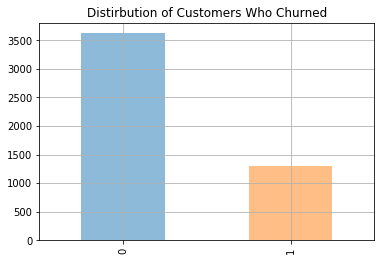

In [40]:
train_df.churn.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of Customers Who Churned")
plt.grid(b = True , which = "major")

**1. Could the month in which customers signed up influence churn?**

- Customers are more likely to churn when they first signed up and also during their sixth year.

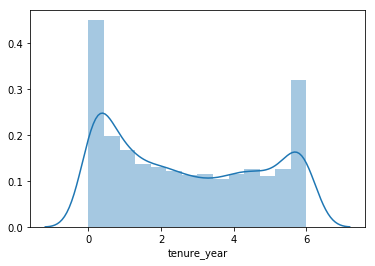

In [53]:
sns.distplot(train_df.tenure_year)

**2. Are there features that indicate a higher propensity to churn?**

_Services/traits/demographic that indicate a higher propensity for churning:_

- Gender does not affect churning.
- Seniors churn more.
- Customers with fiber churn more.
- Month-to-month customers churn more.
- Customers who have paperless billing churn more.
- Customers who use electronic checks churn more.
- Customers without phone service churn less.
- Single customers churn more.
- Customers who don't have internet churn less. Those who have but don't avail themselves of any streaming services churn more. Churning also increases for those who avail themselves both streaming services.
- Those who have internet service but have neither online security or online backup subscriptions churn more than those who do. Customers who have internet service churn less overall.

[]

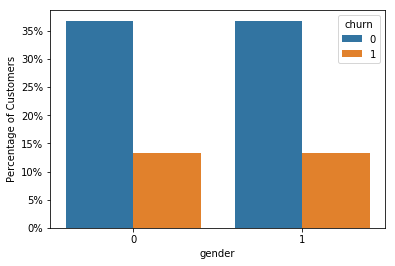

In [57]:
g = train_df.groupby('gender')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='gender', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

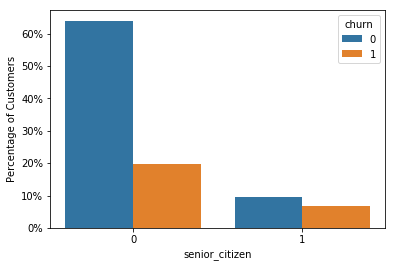

In [58]:
g = train_df.groupby('senior_citizen')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='senior_citizen', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

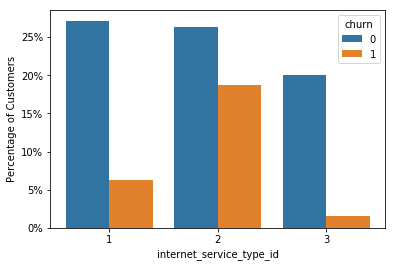

In [59]:
g = train_df.groupby('internet_service_type_id')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='internet_service_type_id', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

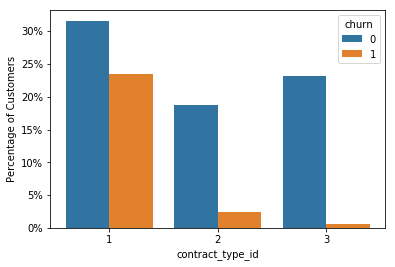

In [60]:
g = train_df.groupby('contract_type_id')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='contract_type_id', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

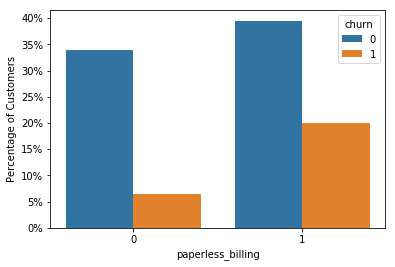

In [61]:
g = train_df.groupby('paperless_billing')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='paperless_billing', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

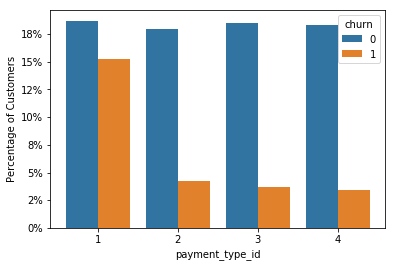

In [62]:
g = train_df.groupby('payment_type_id')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='payment_type_id', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

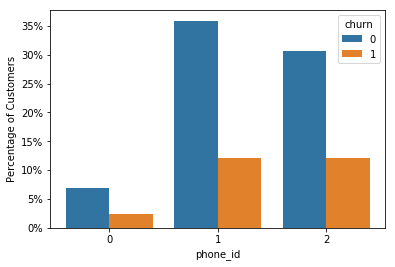

In [63]:
g = train_df.groupby('phone_id')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='phone_id', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

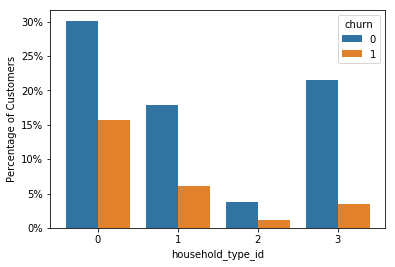

In [64]:
g = train_df.groupby('household_type_id')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='household_type_id', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

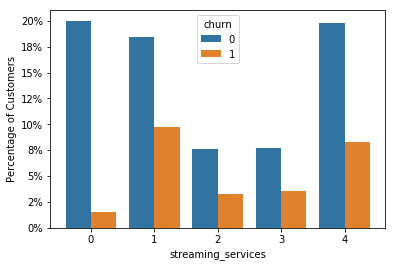

In [65]:
g = train_df.groupby('streaming_services')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='streaming_services', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

[]

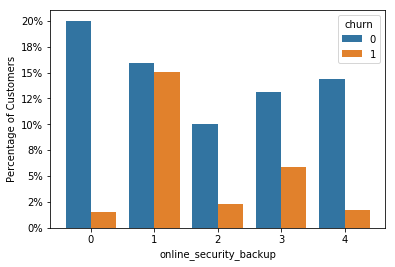

In [66]:
g = train_df.groupby('online_security_backup')['churn'].value_counts().to_frame()
g = g.rename({'churn': 'Percentage of Customers'}, axis=1).reset_index()
g['Percentage of Customers'] = g['Percentage of Customers']/len(train_df)
ax = sns.barplot(x='online_security_backup', y= 'Percentage of Customers', hue='churn', data=g, orient='v')
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
ax.plot()

**3. Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?**

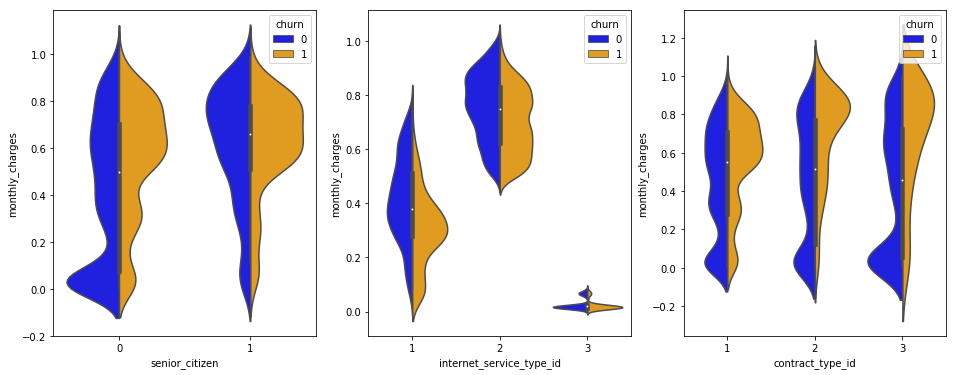

In [68]:
features = ['senior_citizen', 'internet_service_type_id', 'contract_type_id']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train_df, split=True, ax=ax[i], palette=['blue','orange'])

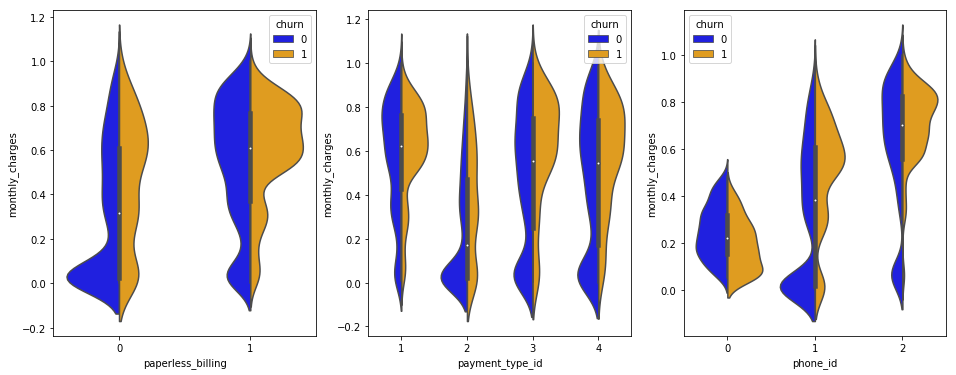

In [69]:
features = ['paperless_billing', 'payment_type_id', 'phone_id']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train_df, split=True, ax=ax[i], palette=['blue','orange'])

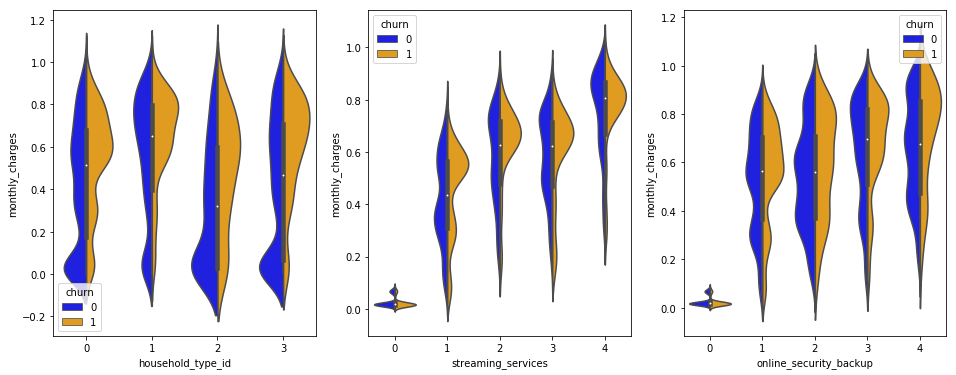

In [70]:
features = ['household_type_id', 'streaming_services',
                     'online_security_backup']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train_df, split=True, ax=ax[i], palette=['blue','orange'])

**4. If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?**

In [71]:
# sp.stats.ttest_ind(
#     train_df[train_df.churn == 1].monthly_charges.dropna(),
#     train_df[train_df.churn == 0].monthly_charges.dropna())

# is the t-statistic < -1.96 or > 1.96?  if so, then look at p-value to ensure it is less than our alpha of .05.

**5. is the mean monthly_charges of those who have churned significantly different from that of those who have not churned?**

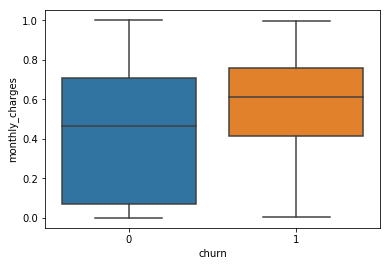

In [75]:
ax = sns.boxplot(x='churn', y='monthly_charges', data=train_df)

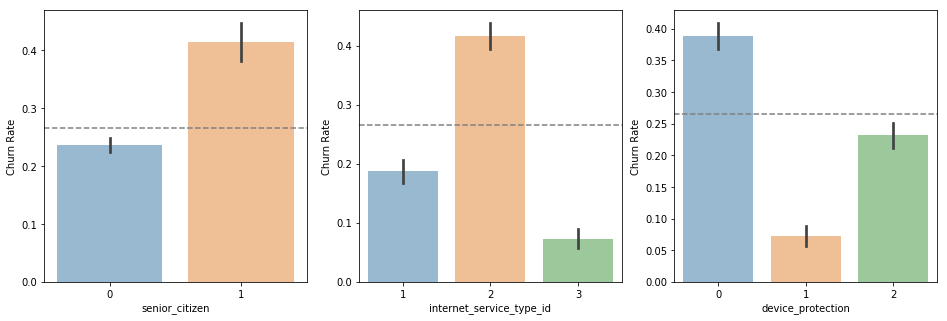

In [76]:
features = ['senior_citizen', 'internet_service_type_id', 'device_protection']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = train_df.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

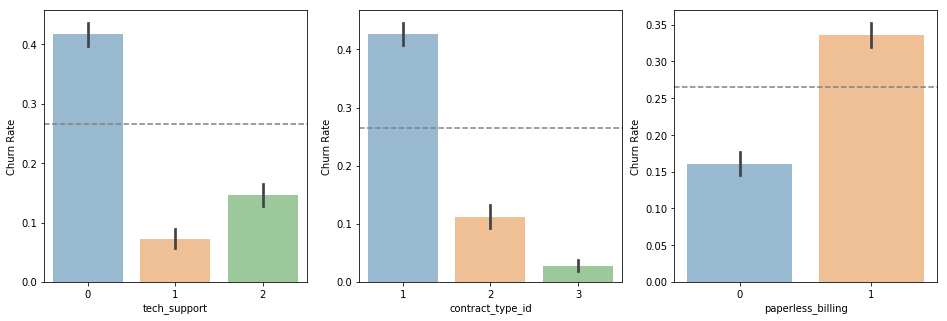

In [77]:
features = ['tech_support', 'contract_type_id', 'paperless_billing']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = train_df.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

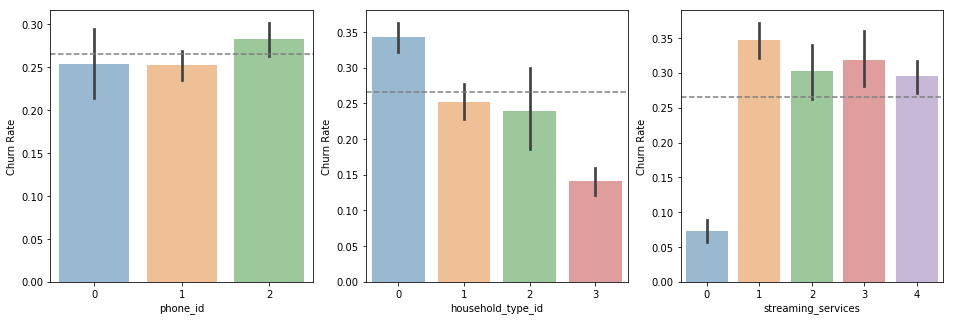

In [78]:
features = ['phone_id', 'household_type_id', 'streaming_services']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = train_df.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

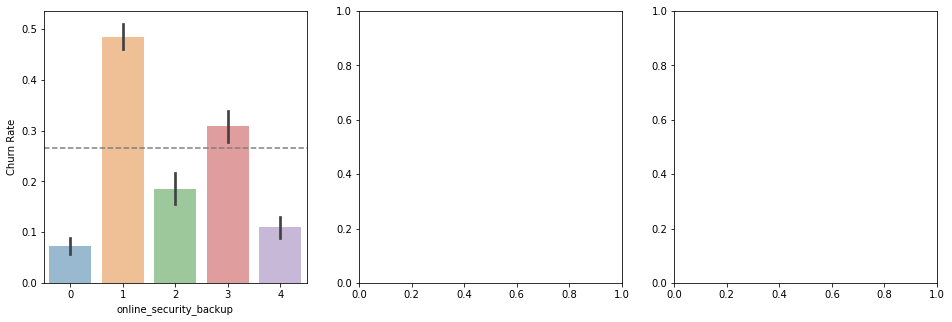

In [79]:
features = ['online_security_backup']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = train_df.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

**6. How much of monthly_charges can be explained by internet_service_type?**

In [74]:
pd.crosstab(train_df.internet_service_type_id, train_df.churn, margins=True).style.background_gradient(cmap='YlOrRd')

churn,0,1,All
internet_service_type_id,,,
1,1338,308,1646
2,1298,923,2221
3,986,77,1063
All,3622,1308,4930


**7. How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines).**

**8. Create visualizations exploring the interactions of variables** (independent with independent and independent with dependent). The goal is to **identify features that are related to churn**

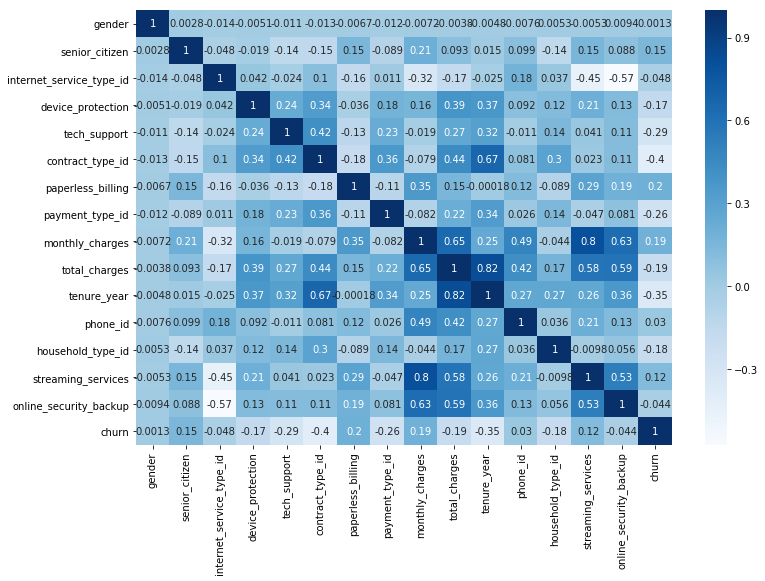

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), cmap='Blues', annot=True)

churn,0,1,All
internet_service_type_id,,,
1,1338,308,1646
2,1298,923,2221
3,986,77,1063
All,3622,1308,4930


## Modeling

1. Feature Selection: Are there any variables that seem to provide limited to no additional information? If so, remove those and assign the new limited dataframe to train_reduced

2. Train (fit, transform, evaluate) a logistic regression model varying your meta-parameters.

3. Compare evaluation metrics across all the models, and select the best performing model.

4. Test the final model (transform, evaluate) on your out-of-sample data (test_df). Summarize the performance. Interpret your results.

# Delivery

1. I will need you to deliver to me a csv with the customer_id, probability of churn, and the prediction of churn (1=churn, 0=not_churn). I would also like a single google slide that illustrates how your model works, including the features being used, so that I can deliver this to the SLT when they come with questions about how these values were derived. Please make sure you include how likely your model is to give a high probability of churn when churn doesn't occur, to give a low probability of churn when churn occurs, and to accurately predict churn.

1. Finally, our development team will need a .py file that will take in a new dataset, (in the exact same form of the one you acquired from telco_churn.customers) and perform all the transformations necessary to run the model you have developed on this new dataset to provide probabilities and predictions.